In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import glob
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/"
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV\run_SARA_LED_2000epoch_SARA_2019-07-10-191141_summary_tb-tag-rollout_return.csv
../SHARCNET/Results/Tensorboard_to_CSV\run_SARA_LED_2000epoch_SARA_2019-07-18-084612_summary_tb-tag-rollout_return.csv
PLA: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV\run_PLA_LED_2000epoch_2019-07-22-202852_summary_tb-tag-rollout_return.csv
Random: 1 files found
../SHARCNET/Results/Tensorboard_to_CSV\run_Random_LED_2000epoch_2019-07-18-084612_summary_tb-tag-rollout_return.csv


In [9]:
all_combined_data = dict()
for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))

    mode_combined_data = pd.DataFrame()
    for i in range(len(all_data_files[mode])):
        mode_combined_data["run"+str(i)] = mode_data[i]["Value"]
    mode_combined_data["avg"] = mode_combined_data.mean(axis=1)
    mode_combined_data['std'] = mode_combined_data.std(axis=1)
#     mode_combined_data.head()
    all_combined_data[mode] = mode_combined_data

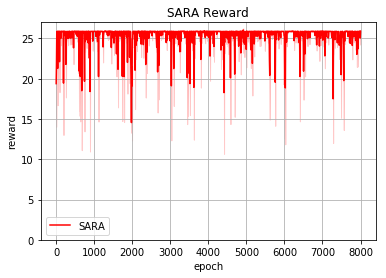

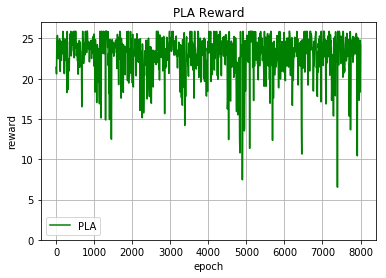

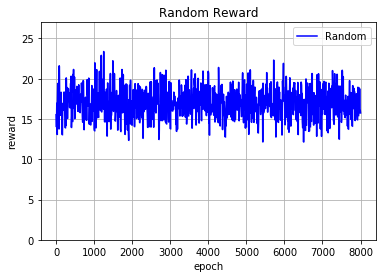

In [21]:
# Plot mean and std
names = ["SARA","PLA","Random"]
colors = ['r','g','b']

for name, c in zip(names, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[name]
    length = data.shape[0]
    plt.fill_between(np.linspace(1,8000,length), data['avg'] - data['std'],
                 data['avg'] + data['std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,8000,length), data['avg'], '-', color=c,
         label=name)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} Reward'.format(name))
    plt.xlabel("epoch")
    plt.ylabel("reward")
